In [17]:
import json
import requests
#from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

In [30]:
# Load a file as a DataFrame and assign to df
df = pd.read_excel("Data/ACT.xlsx")

In [31]:
df.keys()

Index(['ID', 'DS_NOMBRE', 'NM_PUNTAJE', 'DS_RESULTADO', 'FE_RESULTADO'], dtype='object')

In [32]:
#df.columns = ['id', 'nombre encuesta', 'pregunta', 'respuesta','fecha']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15090 entries, 0 to 15089
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            15090 non-null  int64         
 1   DS_NOMBRE     15090 non-null  object        
 2   NM_PUNTAJE    15090 non-null  int64         
 3   DS_RESULTADO  15090 non-null  object        
 4   FE_RESULTADO  15090 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 589.6+ KB


In [34]:
# Cambiar texto a minuscula.
a = df['DS_NOMBRE'].dtype

for col in df.columns:
    if df[col].dtype == a:
        df[col] = df[col].str.lower()
        
df.drop_duplicates()
df = df.drop(columns=['DS_NOMBRE'])
df.columns = ['id','puntaje','resultado','fecha']

In [35]:
df

,id,puntaje,resultado,fecha
0,502989,24,no totalmente controlada,2014-10-28 13:24:49
1,502989,24,no totalmente controlada,2014-10-28 13:24:49
2,502989,24,no totalmente controlada,2014-10-28 13:24:49
3,502989,24,no totalmente controlada,2014-10-28 13:24:49
4,502989,24,no totalmente controlada,2014-10-28 13:24:49
...,...,...,...,...
15085,1999629,24,no totalmente controlada,2018-09-25 13:58:35
15086,1999629,24,no totalmente controlada,2018-09-25 13:58:35
15087,1999629,24,no totalmente controlada,2018-09-25 13:58:35
15088,1999629,24,no totalmente controlada,2018-09-25 13:58:35


## Analisis Variables ##

In [37]:
# ID
id_df = pd.DataFrame(df["id"].value_counts()).reset_index()
id_df.columns = ['id', 'count']
print(id_df['count'].sum())
id_df

15090


,id,count
0,1764814,272
1,739693,270
2,692765,252
3,916510,240
4,1617372,234
...,...,...
453,725649,1
454,1615574,1
455,1500058,1
456,1901262,1


In [25]:
id_df[id_df['count']>1]

,ID,count
0,1764814,272
1,739693,270
2,692765,252
3,916510,240
4,1617372,234
...,...,...
444,1671919,2
445,1877468,2
446,1963695,2
447,1348103,2


In [38]:
# DS_RESULTADO
pd.DataFrame(df["puntaje"].value_counts()).reset_index()

,index,puntaje
0,25,1722
1,20,1513
2,21,1434
3,22,1272
4,23,1138
5,24,1085
6,19,1018
7,18,857
8,17,759
9,15,603


In [40]:
# DS_RESULTADO
pd.DataFrame(df["resultado"].value_counts()).reset_index()

,index,resultado
0,no esta controlada,6926
1,no totalmente controlada,6442
2,totalmente controlada,1722


In [41]:
print(df.groupby(["resultado","puntaje"])["id"].count().reset_index(name="count")\
.sort_values(by="puntaje", ascending = False).reset_index(drop=True).sum())
df.groupby(["resultado","puntaje"])["id"].count().reset_index(name="count")\
.sort_values(by="puntaje", ascending = False).reset_index(drop=True)

resultado    totalmente controladano totalmente controladan...
puntaje                                                    315
count                                                    15090
dtype: object


,resultado,puntaje,count
0,totalmente controlada,25,1722
1,no totalmente controlada,24,1085
2,no totalmente controlada,23,1138
3,no totalmente controlada,22,1272
4,no totalmente controlada,21,1434
5,no totalmente controlada,20,1513
6,no esta controlada,19,1018
7,no esta controlada,18,857
8,no esta controlada,17,759
9,no esta controlada,16,545


Solo hay una pregunta    **para controlar el asma**, y la escala es la siguiente:
- totalmente controlado 25
- no total.. controlado  24-20
- con controlado <20

## Final dataframe

In [48]:
# Agrupando por mes
df["month"]= pd.to_datetime(df['fecha']).dt.to_period('M')
df["year"]= pd.to_datetime(df['fecha']).dt.to_period('Y')
df

,id,puntaje,resultado,fecha,YYYYMM,year
0,502989,24,no totalmente controlada,2014-10-28 13:24:49,2014-10,2014
1,502989,24,no totalmente controlada,2014-10-28 13:24:49,2014-10,2014
2,502989,24,no totalmente controlada,2014-10-28 13:24:49,2014-10,2014
3,502989,24,no totalmente controlada,2014-10-28 13:24:49,2014-10,2014
4,502989,24,no totalmente controlada,2014-10-28 13:24:49,2014-10,2014
...,...,...,...,...,...,...
15085,1999629,24,no totalmente controlada,2018-09-25 13:58:35,2018-09,2018
15086,1999629,24,no totalmente controlada,2018-09-25 13:58:35,2018-09,2018
15087,1999629,24,no totalmente controlada,2018-09-25 13:58:35,2018-09,2018
15088,1999629,24,no totalmente controlada,2018-09-25 13:58:35,2018-09,2018


In [50]:
plot_df = df.groupby(["year","resultado"])["id"].count().reset_index(name="count")\
.sort_values(by="year", ascending = True).reset_index(drop=True)

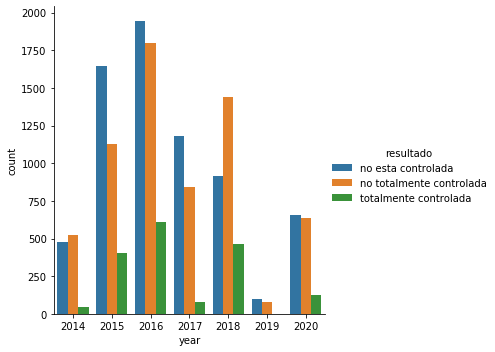

In [51]:
sns.factorplot(x='year', y='count', hue='resultado', data=plot_df, kind='bar')

## Analisis Fecha##

In [39]:
date_df = pd.DataFrame(df["FE_RESULTADO"].value_counts()).reset_index()
date_df.columns = ['fecha', 'count']
date_df = date_df.sort_values(by=['fecha']).reset_index()
date_df.tail()

,index,fecha,count
1705,1603,2020-06-01 09:10:49,4
1706,1488,2020-06-01 12:51:57,5
1707,1694,2020-06-01 13:11:38,2
1708,520,2020-06-01 13:18:34,10
1709,1662,2020-06-01 13:23:26,3


Text(0, 0.5, 'preguntas')

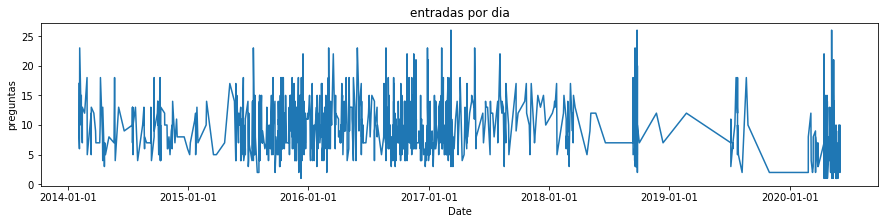

In [40]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(date_df["fecha"], date_df["count"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # format x-axis display
plt.title("entradas por dia")
plt.xlabel("Date")
plt.ylabel("preguntas")

Eliminar duplicados, no tienen sentido.

In [ ]:
df.drop_duplicates()